# **DL_MultiTaskLearning_DonationMaximization**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)

### Data Preparation

In [3]:
df = pd.read_csv('G:\我的雲端硬碟\GitHub_Desktop\DL_MultiTaskLearning_DonationMaximization_\Data\Donar_Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118854 entries, 0 to 118853
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ACCOUNT_ID           118854 non-null  object 
 1   NUMBER_OF_DONATIONS  118854 non-null  int64  
 2   VALUE_OF_DONATIONS   118854 non-null  float64
 3   CITY                 99728 non-null   object 
 4   STATE                99728 non-null   object 
 5   ZIP                  99728 non-null   object 
 6   MI                   12957 non-null   object 
 7   ALUMNI_TYPE          118854 non-null  object 
 8   UG_CLASS_YEAR        118854 non-null  int64  
 9   UG_SCHOOL            70297 non-null   object 
 10  GRAD_DEGREE          54423 non-null   object 
 11  GRAD_CLASS_YEAR      54422 non-null   float64
 12  GRAD_SCHOOL          54393 non-null   object 
 13  GENDER               118854 non-null  object 
 14  MARRIED_TO_ALUM      118854 non-null  object 
 15  ROTC             

In [5]:
df.describe(include = 'all')

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC
count,118854,118854.000000,118854.000000,99728,99728,99728,12957,118854,118854.000000,70297,54423,54422.00000,54393,118854,118854,118854.000000,118854.000000
unique,118854,NaN,NaN,4515,60,87028,20,2,NaN,10,38,NaN,9,2,2,NaN,NaN
top,003o000000pO6zhAAC,NaN,NaN,San Francisco,CA,94118,L,Undergraduate,NaN,College of Arts and Sci (Arts),MA,NaN,School of Education,F,N,NaN,NaN
freq,1,NaN,NaN,13763,77935,38,693,64431,NaN,24244,17376,NaN,16030,67199,115013,NaN,NaN
mean,NaN,0.485714,214.147586,NaN,NaN,NaN,NaN,NaN,1996.331609,NaN,NaN,1999.43736,NaN,NaN,NaN,0.051248,0.089345
std,NaN,1.497361,3033.199077,NaN,NaN,NaN,NaN,NaN,16.569137,NaN,NaN,14.38638,NaN,NaN,NaN,0.220504,0.285242
min,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1855.000000,NaN,NaN,1915.00000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1984.000000,NaN,NaN,1988.00000,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1998.000000,NaN,NaN,2001.00000,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,2012.00000,NaN,NaN,NaN,0.000000,0.000000


In [6]:
df.head()

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC
0,003o000000pO6zhAAC,0,0.0,Gainesville,FL,32605-6400,NaN,Graduate,1969,NaN,MS,1969.0,College of Arts and Sci (Sci),M,N,0,0
1,003o000000pOSIxAAO,1,100.0,Pasadena,CA,91105-1515,NaN,Graduate,1968,NaN,JD,1968.0,School of Law,M,N,0,1
2,003o000000pNvhHAAS,4,1700.0,San Rafael,CA,94901-2478,NaN,Graduate,1964,NaN,JD,1964.0,School of Law,M,N,0,0
3,003o000000q0hl1AAA,0,0.0,San Antonio,TX,78232-4154,T,Undergraduate,1967,School of Nursing,NaN,NaN,NaN,F,N,0,0
4,003o000000pOZe9AAG,5,500.0,Westborough,MA,1581,NaN,Undergraduate,1964,School of Business,NaN,NaN,NaN,M,N,0,1


In [7]:
df.dtypes

ACCOUNT_ID              object
NUMBER_OF_DONATIONS      int64
VALUE_OF_DONATIONS     float64
CITY                    object
STATE                   object
ZIP                     object
MI                      object
ALUMNI_TYPE             object
UG_CLASS_YEAR            int64
UG_SCHOOL               object
GRAD_DEGREE             object
GRAD_CLASS_YEAR        float64
GRAD_SCHOOL             object
GENDER                  object
MARRIED_TO_ALUM         object
ROTC                     int64
JC                       int64
dtype: object

In [8]:
df.isnull().sum()

ACCOUNT_ID                  0
NUMBER_OF_DONATIONS         0
VALUE_OF_DONATIONS          0
CITY                    19126
STATE                   19126
ZIP                     19126
MI                     105897
ALUMNI_TYPE                 0
UG_CLASS_YEAR               0
UG_SCHOOL               48557
GRAD_DEGREE             64431
GRAD_CLASS_YEAR         64432
GRAD_SCHOOL             64461
GENDER                      0
MARRIED_TO_ALUM             0
ROTC                        0
JC                          0
dtype: int64

#### Drop insignificant columns

In [9]:
df = df.drop(['MI'], axis = 1)

#### Unique values in each categorical column

In [10]:
categorical_col = ['ZIP', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR', 'GENDER', 'MARRIED_TO_ALUM', 'ROTC', 'JC']
for c in categorical_col:
  print(df[c].unique())

['32605-6400' '91105-1515' '94901-2478' ... '94108-3820' '96067-1194'
 '95003-3172']
['Graduate' 'Undergraduate']
[nan 'School of Nursing' 'School of Business'
 'College of Arts and Sci (Arts)' 'College of Arts and Sci (Sci)'
 'School of Education' 'College of Prof. Studies' 'School of Law'
 'Sch of Bus and Prof Studies' 'Continuing Education'
 'Not used in standing']
['MS' 'JD' nan 'MA' 'MBA' 'MPA' 'MHR' 'EDD' 'MAT' 'MSE' 'MRA' 'MSP' 'MHL'
 'MSN' 'MPT' 'MNA' 'MMD' 'MAS' 'MAW' 'MFA' 'PSD' 'LLM' 'CRD' 'DNP' 'MGEM'
 'MGEN' 'MPH' 'MOPA' 'PSYD' 'PSM' 'MLSL' 'MIG' 'HON' 'MSA' 'NDG' 'MNB'
 'MCA' 'MSB' 'MPM']
[1969. 1968. 1964.   nan 1927. 1972. 1970. 1973. 1976. 1967. 1961. 1971.
 1974. 1962. 1963. 1965. 1958. 1950. 1980. 1997. 1949. 1979. 1966. 1960.
 1952. 1975. 1998. 1991. 2000. 1987. 1990. 1999. 1943. 2006. 1986. 1930.
 1977. 1981. 1982. 2002. 2005. 1945. 1978. 1985. 1994. 2004. 1992. 1984.
 2003. 1989. 1995. 1996. 1988. 1983. 1993. 2001. 2011. 2015. 2008. 1948.
 2010. 2012. 2020. 2007. 

#### 'ZIP'

In [11]:
df['ZIP_V2'] = df['ZIP'].str.replace('-', '').str[3:]

In [12]:
df['ZIP_V2'] = df['ZIP_V2'].apply(lambda x: '000000' if len(str(x)) < 6 else x)

In [13]:
df['ZIP_V2'] = df['ZIP_V2'].fillna(value = '000000')

#### 'GRAD_SCHOOL'

In [14]:
GRAD_SCHOOL_mapping_dict = {
    'College of Arts and Sci (Sci)': 'Arts and Sciences',
    'College of Arts and Sci (Arts)': 'Arts and Sciences',
    'Col of Arts/Sci and Sch Mgt': 'Arts and Sciences',
    'School of Law': 'Law',
    'School of Education': 'Education',
    'School of Nursing': 'Nursing',
    'School of Business': 'Business and Professional Studies',
    'Sch of Bus and Prof Studies': 'Business and Professional Studies',
    'College of Prof. Studies': 'Business and Professional Studies',
    np.nan: 'GRAD_SCHOOL_Unknown'
}

df['GRAD_SCHOOL'] = df['GRAD_SCHOOL'].replace(GRAD_SCHOOL_mapping_dict)


#### 'UG_SCHOOL'

In [15]:
UG_SCHOOL_mapping_dict = {
    'School of Nursing': 'School of Nursing',
    'School of Business': 'Business and Professional Studies',
    'Sch of Bus and Prof Studies': 'Business and Professional Studies',
    'College of Arts and Sci (Arts)': 'Arts and Sciences',
    'College of Arts and Sci (Sci)': 'Arts and Sciences',
    'School of Education': 'School of Education',
    'College of Prof. Studies': 'Business and Professional Studies',
    'School of Law': 'School of Law',
    'Continuing Education': 'Continuing Education',
    'Not used in standing': 'Not Categorized',
    np.nan: 'UG_SCHOOL_Unknown'
  }

df['UG_SCHOOL'] = df['UG_SCHOOL'].replace(UG_SCHOOL_mapping_dict)


#### 'GENDER', 'MARRIED_TO_ALUM'

In [16]:
GENDER_mapping_dict = {
    'M': 1,
    'F': 0,
    np.nan: 'GENDER_Unknown'
  }

MARRIED_TO_ALUM_mapping_dict = {
    'N': 0,
    'Y': 1,
    np.nan: 'MARRIED_TO_ALUM_Unknown'
  }

df['GENDER'] = df['GENDER'].replace(GENDER_mapping_dict)
df['MARRIED_TO_ALUM'] = df['MARRIED_TO_ALUM'].replace(MARRIED_TO_ALUM_mapping_dict)

#### 'GRAD_CLASS_YEAR', 'UG_CLASS_YEAR'

In [17]:
def year_mapping(year):
    if np.isnan(year):
        return 'NA'
    else:
        return str(int(year//10 * 10)) + 's'

df['UG_CLASS_YEAR'] = df['UG_CLASS_YEAR'].apply(year_mapping)
df['GRAD_CLASS_YEAR'] = df['GRAD_CLASS_YEAR'].apply(year_mapping)

#### 'GRAD_DEGREE'

In [18]:
df['GRAD_DEGREE'] = df['GRAD_DEGREE'].fillna(value = 'NA')

#### 'DONATED'

In [19]:
df['DONATED'] = df['NUMBER_OF_DONATIONS'].apply(lambda x: 1 if x > 0 else 0)

#### 'AVERAGE_DONATIONS'

In [20]:
df['AVERAGE_DONATIONS'] = df['VALUE_OF_DONATIONS'] / df['NUMBER_OF_DONATIONS']


#### Unique Values

In [21]:
categorical_col = ['STATE', 'CITY', 'ZIP_V2', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR', 'GENDER', 'MARRIED_TO_ALUM', 'ROTC', 'JC']
for c in categorical_col:
  print(df[c].unique())

['FL' 'CA' 'TX' 'MA' nan 'TN' 'WA' 'UT' 'NY' 'MN' 'ID' 'VA' 'NC' 'WI' 'CO'
 'LA' 'OR' 'NV' 'NM' 'KY' 'IL' 'HI' 'MO' 'NE' 'AR' 'GA' 'AZ' 'IA' 'RI'
 'ME' 'AK' 'DC' 'AL' 'MD' 'MT' 'CT' 'MI' 'WY' 'OK' 'NH' 'NJ' 'PA' 'VT'
 'DE' 'OH' 'SC' 'WV' 'IN' 'MS' 'SD' 'KS' 'GU' 'AP' 'ND' 'MP' 'VI' 'AE'
 'PR' 'AS' 'FM' 'AA']
['Gainesville' 'Pasadena' 'San Rafael' ... 'Cambria Heights' 'Wilson'
 'Lake View Ter']
['056400' '051515' '012478' ... '156110' '083820' '671194']
['Graduate' 'Undergraduate']
['UG_SCHOOL_Unknown' 'School of Nursing'
 'Business and Professional Studies' 'Arts and Sciences'
 'School of Education' 'School of Law' 'Continuing Education'
 'Not Categorized']
['MS' 'JD' 'NA' 'MA' 'MBA' 'MPA' 'MHR' 'EDD' 'MAT' 'MSE' 'MRA' 'MSP' 'MHL'
 'MSN' 'MPT' 'MNA' 'MMD' 'MAS' 'MAW' 'MFA' 'PSD' 'LLM' 'CRD' 'DNP' 'MGEM'
 'MGEN' 'MPH' 'MOPA' 'PSYD' 'PSM' 'MLSL' 'MIG' 'HON' 'MSA' 'NDG' 'MNB'
 'MCA' 'MSB' 'MPM']
['1960s' 'NA' '1920s' '1970s' '1950s' '1980s' '1990s' '1940s' '2000s'
 '1930s' '2010s' '2020s

#### Missing Value

In [22]:
df.isnull().sum()

ACCOUNT_ID                 0
NUMBER_OF_DONATIONS        0
VALUE_OF_DONATIONS         0
CITY                   19126
STATE                  19126
ZIP                    19126
ALUMNI_TYPE                0
UG_CLASS_YEAR              0
UG_SCHOOL                  0
GRAD_DEGREE                0
GRAD_CLASS_YEAR            0
GRAD_SCHOOL                0
GENDER                     0
MARRIED_TO_ALUM            0
ROTC                       0
JC                         0
ZIP_V2                     0
DONATED                    0
AVERAGE_DONATIONS      98620
dtype: int64

In [23]:
df['STATE'].fillna('NA', inplace=True)
df['CITY'].fillna('NA', inplace=True)
df['AVERAGE_DONATIONS'].fillna(0, inplace=True)

#### Split the Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop(['ZIP','DONATED', 'NUMBER_OF_DONATIONS', 'VALUE_OF_DONATIONS', 'ACCOUNT_ID', 'AVERAGE_DONATIONS'], axis = 1)
Y_regression = df['VALUE_OF_DONATIONS']
Y_classification= df['DONATED']

In [26]:
X_train_val, X_test, Y_regression_train_val, Y_regression_test, Y_classification_train_val, Y_classification_test = train_test_split(X, Y_regression, Y_classification, test_size=0.3, random_state=30)
X_train, X_val, Y_regression_train, Y_regression_val, Y_classification_train, Y_classification_val = train_test_split(X_train_val, Y_regression_train_val, Y_classification_train_val, test_size=0.25, random_state=30)

#### Categorical Variable

In [27]:
from category_encoders import CountEncoder, TargetEncoder

In [28]:
categorical_column=['ZIP_V2', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR','STATE','CITY']

In [29]:
target_encoder = TargetEncoder()
encoder=target_encoder.fit(X_train[categorical_column], Y_classification_train)

In [30]:
def encode_columns(encoder,X,Y):
    encoded_columns = target_encoder.transform(X[categorical_column], Y)
    encoded_columns = encoded_columns.rename(columns = {'ZIP_V2': 'ZIP_ENCODED', 'ALUMNI_TYPE': 'ALUMNI_TYPE_ENCODED', 'UG_SCHOOL': 'UG_SCHOOL_ENCODED', 'GRAD_DEGREE': 'GRAD_DEGREE_ENCODED', 'GRAD_CLASS_YEAR': 'GRAD_CLASS_YEAR_ENCODED', 'GRAD_SCHOOL': 'GRAD_SCHOOL_ENCODED', 'UG_CLASS_YEAR': 'UG_CLASS_YEAR_ENCODED','STATE': 'STATE_ENCODED', 'CITY': 'CITY_ENCODED'})

    X_encoded = pd.concat([X, pd.DataFrame(encoded_columns)], axis = 1)
    X_encoded = X_encoded.drop(['ZIP_V2', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR','STATE','CITY'], axis = 1)
    return X_encoded

In [31]:
X_train_encoded=encode_columns(encoder,X_train,Y_classification_train)
X_val_encoded=encode_columns(encoder,X_val,Y_classification_val)
X_test_encoded=encode_columns(encoder,X_test,Y_classification_test)

### Data Exploration

### Data Modeling

In [32]:
import os
from datetime import datetime

from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow import keras

import mlflow
import optuna

c:\Users\Reazeng\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Set up MLflow

In [36]:
TRACKING_URI = "http://127.0.0.1:5000"
EXPERIMENT_NAME = "DonationMaximization"

mlflow.set_tracking_uri(TRACKING_URI)

mlflow.set_experiment(EXPERIMENT_NAME)

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if experiment is None:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME) 
else:
    experiment_id = experiment.experiment_id

#### Tune Hyperparameters

In [ ]:
def objective(trial):

    with mlflow.start_run(nested=True) as run:

        trial_num = trial.number
        mlflow.set_tag("trial_num", trial_num)
        
        # Set up Options for Hyperparameters Tuning
        units = trial.suggest_categorical("units", [16, 32, 64, 128])
        dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
        learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)
        activation = trial.suggest_categorical("activation", ["relu", "elu", "tanh"])
        
        # Log Parameters to MLflow
        params = {
            "units": units,
            "dropout_rate": dropout_rate,
            "learning_rate": learning_rate,
            "activation": activation,
            "batch_size": 32,
            "epochs": 50,
            "run_id": run.info.run_id
        }
        mlflow.log_params(params)
        
        # Model Building
        inputs = tf.keras.Input(shape=X_train_encoded.shape[1:])
        x = inputs
        x = tf.keras.layers.Dense(units, activation=activation)(x)
        x = tf.keras.layers.Dense(units, activation=activation)(x)
        x = tf.keras.layers.Dense(units, activation=activation)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        
        reg_output = tf.keras.layers.Dense(1, name='regression_output')(x)
        class_output = tf.keras.layers.Dense(1, activation='sigmoid', name='classification_output')(x)
        
        model = tf.keras.Model(inputs=inputs, outputs=[reg_output, class_output])
        
        # Model Compilation
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            loss={
                'regression_output': 'mse',
                'classification_output': 'binary_crossentropy'
            },
            metrics={
                'regression_output': 'mae',
                'classification_output': tf.keras.metrics.Recall(name='recall')
            }
        )
        
        # Model Training
        class_weights = compute_class_weight('balanced', classes=Y_classification_train.unique(), y=Y_classification_train)
        weight_map = {i: weight for i, weight in zip(Y_classification_train.unique(), class_weights)}
        sample_weights = np.array([weight_map[y] for y in Y_classification_train])
        
        history = model.fit(
            x=X_train_encoded,
            y={'regression_output': Y_regression_train, 'classification_output': Y_classification_train},
            validation_data=(X_val_encoded, {'regression_output': Y_regression_val, 'classification_output': Y_classification_val}),
            epochs=50,
            batch_size=32,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(monitor='val_classification_output_recall', patience=5, restore_best_weights=True)
            ],
            verbose=0,
            sample_weight=sample_weights
        )
    
        best_recall = max(history.history['val_classification_output_recall'])
        
        # Log Metrics to MLflow
        for epoch in range(len(history.history['loss'])):
            metrics_dict = {}
            for metric_name, values in history.history.items():
                if epoch < len(values):
                    metrics_dict[metric_name] = values[epoch]
            mlflow.log_metrics(metrics_dict, step=epoch)
            
        # Set user attributes for best trial in parent Run
        trial.set_user_attr("run_id", run.info.run_id)
        trial.set_user_attr("model_path", f"model_trial_{trial.number}")    
        for metric_name, value in metrics_dict.items():
            trial.set_user_attr(metric_name, value)
        
        # Log model to MLflow
        model_name = f"model_trial_{trial_num}"
        mlflow.keras.log_model(keras_model=model, artifact_path=model_name)
        
        return best_recall

# Optimize Hyperparameters conducting Optuna
now = datetime.now().strftime("%Y%m%d_%H%M")
with mlflow.start_run(run_name=f"Optuna_Optimization_{now}") as main_run:
    study = optuna.create_study(direction="maximize", study_name="Optuna_Optimization")
    study.optimize(objective, n_trials=5) 
    
    # Generate Best Trial Information
    best_trial_num = study.best_trial.number
    best_recall = study.best_value
    
    # Log Parameters
    mlflow.log_params({
        "best_trial": best_trial_num,
        "best_recall": best_recall,
        "total_trials": len(study.trials)
    })
    
    mlflow.log_params({f"best_{k}": v for k, v in study.best_params.items()})
    
    # Log Metrics
    best_metrics = {}
    for key, value in study.best_trial.user_attrs.items():
        if isinstance(value, (int, float)):
            best_metrics[key] = value
    mlflow.log_metrics(best_metrics)

    
    # Generate best trial information for loading best model
    best_trial = study.best_trial
    best_run_id = best_trial.user_attrs["run_id"]
    best_model_path = best_trial.user_attrs["model_path"]
    
    # Load best model
    best_model_uri = f"runs:/{best_run_id}/{best_model_path}"
    best_model = mlflow.keras.load_model(best_model_uri)
    mlflow.keras.log_model(
        keras_model=best_model, 
        artifact_path="best_model",
        registered_model_name="DonationMaximization_MTL_Model"
    )

---

### Deploy the Model

In [ ]:
import mlflow
from mlflow.tracking import MlflowClient

def Transition_to_Production(model_name):
    
    """
    Transition the best model version to production and archive others

    Args:
        model_name (str): Name of the model to transition
    Returns:
        best_version (str): The version of the model transitioned to production
    """

    client = MlflowClient()
    
    versions = client.search_model_versions(f"name='{model_name}'")
    
    best_version = None
    best_recall = 0

    # Transition the Best Model Version to Production
    for v in versions:
        if v.run_id:
            run = client.get_run(v.run_id)
            val_recall = run.data.metrics.get("best_recall", float('inf'))
            
            if val_recall > best_recall:
                best_recall = val_recall
                best_version = v.version
    
    if best_version:
        client.transition_model_version_stage(
            name=model_name,
            version=best_version,
            stage="Production"
        )
        
        # Archive other Versions
        for v in versions:
            if v.version != best_version and v.current_stage != "Archived":
                client.transition_model_version_stage(
                    name=model_name,
                    version=v.version,
                    stage="Archived"
                )
        
        print(f"{best_version} ({best_recall:.6f}) transitioned to production")
        return best_version
    else:
        print(f"No production-level model for {model_name}")
        return None
    
Transition_to_Production("DonationMaximization_MTL_Model")

---

### Predict with Production Model

In [ ]:
import mlflow
from mlflow.tracking import MlflowClient

def Predict_Production_Model(model_name, input_data):
    """
    Predict with the production model version
    
    Args:
        model_name (str): Name of the model
        input_data (dataframe): Input data for prediction
    
    Returns:
        dict: Prediction results.
    """
    client = MlflowClient()
    
    # Generate the production model version
    production_version = client.get_latest_versions(model_name, stages=["Production"])[0].version
    print(production_version)
    
    if not production_version:
        print(f"No production version found for model {model_name}")
    
    # Load the model
    model_uri = f"models:/{model_name}/Production"
    model = mlflow.keras.load_model(model_uri)
    
    # Generate predictions
    predictions_reg, predictions_class=model.predict(input_data)
    
    return model, predictions_reg, predictions_class

In [303]:
model, predictions_reg, predictions_class=Predict_Production_Model("DonationMaximization_MTL_Model", X_test_encoded)

3
(35657, 13)
1115/1115 [==============================] - 3s 3ms/step


### Feature importance: Shape

In [61]:
import shap

In [62]:
def predict_class(x):
    prediction = best_model.predict(x)
    return prediction[0]

def predict_reg(x):
    prediction = best_model.predict(x)
    return prediction[1]

sample_data=shap.sample(X_train_encoded, 100)

explainer_class = shap.KernelExplainer(predict_class, sample_data)
explainer_reg = shap.KernelExplainer(predict_reg, sample_data)

explain_data= shap.sample(X_test_encoded, 100)

shap_values_class = explainer_class.shap_values(explain_data)
shap_values_reg = explainer_reg.shap_values(explain_data)

4/4 [==============================] - 0s 2ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

6482/6482 [==============================] - 21s 3ms/step


  1%|          | 1/100 [00:29<49:26, 29.96s/it]

6482/6482 [==============================] - 17s 3ms/step


  2%|▏         | 2/100 [00:53<43:11, 26.44s/it]

6482/6482 [==============================] - 17s 3ms/step


  3%|▎         | 3/100 [01:17<40:20, 24.96s/it]

6482/6482 [==============================] - 17s 3ms/step


  4%|▍         | 4/100 [01:40<38:47, 24.24s/it]

6482/6482 [==============================] - 18s 3ms/step


  5%|▌         | 5/100 [02:04<38:25, 24.27s/it]

6482/6482 [==============================] - 17s 3ms/step


  6%|▌         | 6/100 [02:27<37:29, 23.93s/it]

6482/6482 [==============================] - 17s 3ms/step


  7%|▋         | 7/100 [02:51<36:44, 23.70s/it]

6482/6482 [==============================] - 17s 3ms/step


  8%|▊         | 8/100 [03:14<36:03, 23.51s/it]

6482/6482 [==============================] - 16s 3ms/step


  9%|▉         | 9/100 [03:37<35:23, 23.34s/it]

6482/6482 [==============================] - 17s 3ms/step


 10%|█         | 10/100 [04:00<34:58, 23.32s/it]

6482/6482 [==============================] - 16s 3ms/step


 11%|█         | 11/100 [04:23<34:21, 23.16s/it]

6482/6482 [==============================] - 17s 3ms/step


 12%|█▏        | 12/100 [04:46<34:04, 23.23s/it]

6482/6482 [==============================] - 17s 3ms/step


 13%|█▎        | 13/100 [05:09<33:35, 23.17s/it]

6482/6482 [==============================] - 17s 3ms/step


 14%|█▍        | 14/100 [05:32<33:07, 23.11s/it]

6482/6482 [==============================] - 17s 3ms/step


 15%|█▌        | 15/100 [05:55<32:44, 23.11s/it]

6482/6482 [==============================] - 17s 3ms/step


 16%|█▌        | 16/100 [06:18<32:14, 23.03s/it]

6482/6482 [==============================] - 17s 3ms/step


 17%|█▋        | 17/100 [06:42<32:01, 23.15s/it]

6482/6482 [==============================] - 17s 3ms/step


 18%|█▊        | 18/100 [07:05<31:45, 23.24s/it]

6482/6482 [==============================] - 17s 3ms/step


 19%|█▉        | 19/100 [07:28<31:21, 23.22s/it]

6482/6482 [==============================] - 16s 3ms/step


 20%|██        | 20/100 [07:51<30:55, 23.19s/it]

6482/6482 [==============================] - 17s 3ms/step


 21%|██        | 21/100 [08:14<30:30, 23.17s/it]

6482/6482 [==============================] - 17s 3ms/step


 22%|██▏       | 22/100 [08:38<30:06, 23.16s/it]

6482/6482 [==============================] - 17s 3ms/step


 23%|██▎       | 23/100 [09:01<29:43, 23.16s/it]

6482/6482 [==============================] - 17s 3ms/step


 24%|██▍       | 24/100 [09:24<29:16, 23.11s/it]

6482/6482 [==============================] - 17s 3ms/step


 25%|██▌       | 25/100 [09:47<28:51, 23.08s/it]

6482/6482 [==============================] - 17s 3ms/step


 26%|██▌       | 26/100 [10:10<28:27, 23.08s/it]

6482/6482 [==============================] - 17s 3ms/step


 27%|██▋       | 27/100 [10:33<28:06, 23.10s/it]

6482/6482 [==============================] - 17s 3ms/step


 28%|██▊       | 28/100 [10:56<27:47, 23.16s/it]

6482/6482 [==============================] - 17s 3ms/step


 29%|██▉       | 29/100 [11:19<27:22, 23.13s/it]

6482/6482 [==============================] - 17s 3ms/step


 30%|███       | 30/100 [11:43<27:03, 23.20s/it]

6482/6482 [==============================] - 17s 3ms/step


 31%|███       | 31/100 [12:06<26:39, 23.19s/it]

6482/6482 [==============================] - 17s 3ms/step


 32%|███▏      | 32/100 [12:29<26:12, 23.12s/it]

6482/6482 [==============================] - 17s 3ms/step


 33%|███▎      | 33/100 [12:52<25:47, 23.10s/it]

6482/6482 [==============================] - 17s 3ms/step


 34%|███▍      | 34/100 [13:15<25:23, 23.09s/it]

6482/6482 [==============================] - 17s 3ms/step


 35%|███▌      | 35/100 [13:38<25:00, 23.08s/it]

6482/6482 [==============================] - 17s 3ms/step


 36%|███▌      | 36/100 [14:01<24:35, 23.06s/it]

6482/6482 [==============================] - 17s 3ms/step


 37%|███▋      | 37/100 [14:24<24:12, 23.05s/it]

6482/6482 [==============================] - 17s 3ms/step


 38%|███▊      | 38/100 [14:47<23:48, 23.04s/it]

6482/6482 [==============================] - 17s 3ms/step


 39%|███▉      | 39/100 [15:10<23:27, 23.07s/it]

6482/6482 [==============================] - 17s 3ms/step


 40%|████      | 40/100 [15:34<23:11, 23.20s/it]

6482/6482 [==============================] - 17s 3ms/step


 41%|████      | 41/100 [15:57<22:49, 23.21s/it]

6482/6482 [==============================] - 17s 3ms/step


 42%|████▏     | 42/100 [16:20<22:23, 23.16s/it]

6482/6482 [==============================] - 17s 3ms/step


 43%|████▎     | 43/100 [16:43<22:05, 23.25s/it]

6482/6482 [==============================] - 17s 3ms/step


 44%|████▍     | 44/100 [17:07<21:43, 23.28s/it]

6482/6482 [==============================] - 17s 3ms/step


 45%|████▌     | 45/100 [17:30<21:16, 23.21s/it]

6482/6482 [==============================] - 17s 3ms/step


 46%|████▌     | 46/100 [17:53<20:49, 23.14s/it]

6482/6482 [==============================] - 17s 3ms/step


 47%|████▋     | 47/100 [18:16<20:27, 23.16s/it]

6482/6482 [==============================] - 17s 3ms/step


 48%|████▊     | 48/100 [18:39<20:02, 23.13s/it]

6482/6482 [==============================] - 17s 3ms/step


 49%|████▉     | 49/100 [19:02<19:37, 23.09s/it]

6482/6482 [==============================] - 17s 3ms/step


 50%|█████     | 50/100 [19:25<19:17, 23.14s/it]

6482/6482 [==============================] - 17s 3ms/step


 51%|█████     | 51/100 [19:49<18:56, 23.19s/it]

6482/6482 [==============================] - 17s 3ms/step


 52%|█████▏    | 52/100 [20:12<18:40, 23.35s/it]

6482/6482 [==============================] - 17s 3ms/step


 53%|█████▎    | 53/100 [20:35<18:14, 23.29s/it]

6482/6482 [==============================] - 17s 3ms/step


 54%|█████▍    | 54/100 [20:59<17:49, 23.26s/it]

6482/6482 [==============================] - 17s 3ms/step


 55%|█████▌    | 55/100 [21:22<17:24, 23.22s/it]

6482/6482 [==============================] - 17s 3ms/step


 56%|█████▌    | 56/100 [21:45<17:01, 23.21s/it]

6482/6482 [==============================] - 17s 3ms/step


 57%|█████▋    | 57/100 [22:08<16:37, 23.20s/it]

6482/6482 [==============================] - 17s 3ms/step


 58%|█████▊    | 58/100 [22:31<16:15, 23.23s/it]

6482/6482 [==============================] - 17s 3ms/step


 59%|█████▉    | 59/100 [22:55<15:51, 23.21s/it]

6482/6482 [==============================] - 17s 3ms/step


 60%|██████    | 60/100 [23:18<15:27, 23.19s/it]

6482/6482 [==============================] - 17s 3ms/step


 61%|██████    | 61/100 [23:41<15:03, 23.18s/it]

6482/6482 [==============================] - 17s 3ms/step


 62%|██████▏   | 62/100 [24:04<14:39, 23.14s/it]

6482/6482 [==============================] - 17s 3ms/step


 63%|██████▎   | 63/100 [24:27<14:17, 23.17s/it]

6482/6482 [==============================] - 17s 3ms/step


 64%|██████▍   | 64/100 [24:50<13:53, 23.15s/it]

6482/6482 [==============================] - 17s 3ms/step


 65%|██████▌   | 65/100 [25:14<13:31, 23.18s/it]

6482/6482 [==============================] - 17s 3ms/step


 66%|██████▌   | 66/100 [25:36<13:05, 23.10s/it]

6482/6482 [==============================] - 17s 3ms/step


 67%|██████▋   | 67/100 [26:00<12:42, 23.10s/it]

6482/6482 [==============================] - 17s 3ms/step


 68%|██████▊   | 68/100 [26:23<12:23, 23.23s/it]

6482/6482 [==============================] - 19s 3ms/step


 69%|██████▉   | 69/100 [26:49<12:26, 24.09s/it]

6482/6482 [==============================] - 17s 3ms/step


 70%|███████   | 70/100 [27:13<12:01, 24.05s/it]

6482/6482 [==============================] - 17s 3ms/step


 71%|███████   | 71/100 [27:37<11:37, 24.04s/it]

6482/6482 [==============================] - 17s 3ms/step


 72%|███████▏  | 72/100 [28:00<11:04, 23.75s/it]

6482/6482 [==============================] - 17s 3ms/step


 73%|███████▎  | 73/100 [28:23<10:35, 23.53s/it]

6482/6482 [==============================] - 17s 3ms/step


 74%|███████▍  | 74/100 [28:46<10:09, 23.43s/it]

6482/6482 [==============================] - 17s 3ms/step


 75%|███████▌  | 75/100 [29:10<09:44, 23.40s/it]

6482/6482 [==============================] - 17s 3ms/step


 76%|███████▌  | 76/100 [29:33<09:19, 23.30s/it]

6482/6482 [==============================] - 17s 3ms/step


 77%|███████▋  | 77/100 [29:57<09:03, 23.62s/it]

6482/6482 [==============================] - 17s 3ms/step


 78%|███████▊  | 78/100 [30:20<08:36, 23.48s/it]

6482/6482 [==============================] - 17s 3ms/step


 79%|███████▉  | 79/100 [30:43<08:09, 23.31s/it]

6482/6482 [==============================] - 17s 3ms/step


 80%|████████  | 80/100 [31:06<07:45, 23.27s/it]

6482/6482 [==============================] - 17s 3ms/step


 81%|████████  | 81/100 [31:30<07:21, 23.23s/it]

6482/6482 [==============================] - 17s 3ms/step


 82%|████████▏ | 82/100 [31:53<06:59, 23.29s/it]

6482/6482 [==============================] - 17s 3ms/step


 83%|████████▎ | 83/100 [32:16<06:36, 23.32s/it]

6482/6482 [==============================] - 17s 3ms/step


 84%|████████▍ | 84/100 [32:40<06:12, 23.26s/it]

6482/6482 [==============================] - 17s 3ms/step


 85%|████████▌ | 85/100 [33:03<05:48, 23.22s/it]

6482/6482 [==============================] - 17s 3ms/step


 86%|████████▌ | 86/100 [33:26<05:24, 23.21s/it]

6482/6482 [==============================] - 17s 3ms/step


 87%|████████▋ | 87/100 [33:49<05:02, 23.27s/it]

6482/6482 [==============================] - 17s 3ms/step


 88%|████████▊ | 88/100 [34:13<04:39, 23.26s/it]

6482/6482 [==============================] - 17s 3ms/step


 89%|████████▉ | 89/100 [34:35<04:14, 23.17s/it]

6482/6482 [==============================] - 17s 3ms/step


 90%|█████████ | 90/100 [34:59<03:51, 23.17s/it]

6482/6482 [==============================] - 18s 3ms/step


 91%|█████████ | 91/100 [35:25<03:36, 24.06s/it]

6482/6482 [==============================] - 19s 3ms/step


 92%|█████████▏| 92/100 [35:51<03:18, 24.76s/it]

6482/6482 [==============================] - 18s 3ms/step


 93%|█████████▎| 93/100 [36:17<02:55, 25.05s/it]

6482/6482 [==============================] - 18s 3ms/step


 94%|█████████▍| 94/100 [36:42<02:30, 25.13s/it]

6482/6482 [==============================] - 17s 3ms/step


 95%|█████████▌| 95/100 [37:06<02:02, 24.59s/it]

6482/6482 [==============================] - 17s 3ms/step


 96%|█████████▌| 96/100 [37:29<01:36, 24.16s/it]

6482/6482 [==============================] - 18s 3ms/step


 97%|█████████▋| 97/100 [37:53<01:12, 24.26s/it]

6482/6482 [==============================] - 17s 3ms/step


 98%|█████████▊| 98/100 [38:16<00:47, 23.95s/it]

6482/6482 [==============================] - 17s 3ms/step


 99%|█████████▉| 99/100 [38:40<00:23, 23.88s/it]

6482/6482 [==============================] - 17s 3ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

6482/6482 [==============================] - 22s 3ms/step


  1%|          | 1/100 [00:31<52:02, 31.54s/it]

6482/6482 [==============================] - 19s 3ms/step


  2%|▏         | 2/100 [00:57<46:17, 28.35s/it]

6482/6482 [==============================] - 17s 3ms/step


  3%|▎         | 3/100 [01:21<42:23, 26.22s/it]

6482/6482 [==============================] - 17s 3ms/step


  4%|▍         | 4/100 [01:44<40:11, 25.12s/it]

6482/6482 [==============================] - 17s 3ms/step


  5%|▌         | 5/100 [02:08<38:44, 24.47s/it]

6482/6482 [==============================] - 17s 3ms/step


  6%|▌         | 6/100 [02:31<37:42, 24.07s/it]

6482/6482 [==============================] - 17s 3ms/step


  7%|▋         | 7/100 [02:54<36:55, 23.82s/it]

6482/6482 [==============================] - 17s 3ms/step


  8%|▊         | 8/100 [03:17<36:10, 23.59s/it]

6482/6482 [==============================] - 17s 3ms/step


  9%|▉         | 9/100 [03:41<35:37, 23.49s/it]

6482/6482 [==============================] - 17s 3ms/step


 10%|█         | 10/100 [04:04<35:09, 23.44s/it]

6482/6482 [==============================] - 17s 3ms/step


 11%|█         | 11/100 [04:27<34:50, 23.49s/it]

6482/6482 [==============================] - 17s 3ms/step


 12%|█▏        | 12/100 [04:51<34:18, 23.39s/it]

6482/6482 [==============================] - 17s 3ms/step


 13%|█▎        | 13/100 [05:14<33:51, 23.36s/it]

6482/6482 [==============================] - 17s 3ms/step


 14%|█▍        | 14/100 [05:37<33:22, 23.28s/it]

6482/6482 [==============================] - 17s 3ms/step


 15%|█▌        | 15/100 [06:00<33:01, 23.31s/it]

6482/6482 [==============================] - 17s 3ms/step


 16%|█▌        | 16/100 [06:24<32:32, 23.24s/it]

6482/6482 [==============================] - 17s 3ms/step


 17%|█▋        | 17/100 [06:47<32:10, 23.26s/it]

6482/6482 [==============================] - 17s 3ms/step


 18%|█▊        | 18/100 [07:10<31:46, 23.25s/it]

6482/6482 [==============================] - 17s 3ms/step


 19%|█▉        | 19/100 [07:33<31:25, 23.28s/it]

6482/6482 [==============================] - 17s 3ms/step


 20%|██        | 20/100 [07:57<31:00, 23.25s/it]

6482/6482 [==============================] - 17s 3ms/step


 21%|██        | 21/100 [08:20<30:39, 23.29s/it]

6482/6482 [==============================] - 17s 3ms/step


 22%|██▏       | 22/100 [08:43<30:17, 23.30s/it]

6482/6482 [==============================] - 17s 3ms/step


 23%|██▎       | 23/100 [09:07<30:02, 23.42s/it]

6482/6482 [==============================] - 17s 3ms/step


 24%|██▍       | 24/100 [09:30<29:32, 23.33s/it]

6482/6482 [==============================] - 17s 3ms/step


 25%|██▌       | 25/100 [09:53<29:08, 23.31s/it]

6482/6482 [==============================] - 17s 3ms/step


 26%|██▌       | 26/100 [10:17<28:58, 23.50s/it]

6482/6482 [==============================] - 18s 3ms/step


 27%|██▋       | 27/100 [10:42<29:03, 23.88s/it]

6482/6482 [==============================] - 17s 3ms/step


 28%|██▊       | 28/100 [11:05<28:23, 23.66s/it]

6482/6482 [==============================] - 17s 3ms/step


 29%|██▉       | 29/100 [11:29<28:00, 23.66s/it]

6482/6482 [==============================] - 20s 3ms/step


 30%|███       | 30/100 [11:55<28:37, 24.54s/it]

6482/6482 [==============================] - 17s 3ms/step


 31%|███       | 31/100 [12:19<27:46, 24.16s/it]

6482/6482 [==============================] - 17s 3ms/step


 32%|███▏      | 32/100 [12:42<27:10, 23.98s/it]

6482/6482 [==============================] - 18s 3ms/step


 33%|███▎      | 33/100 [13:07<27:00, 24.19s/it]

6482/6482 [==============================] - 17s 3ms/step


 34%|███▍      | 34/100 [13:31<26:27, 24.06s/it]

6482/6482 [==============================] - 17s 3ms/step


 35%|███▌      | 35/100 [13:54<25:47, 23.81s/it]

6482/6482 [==============================] - 17s 3ms/step


 36%|███▌      | 36/100 [14:18<25:24, 23.83s/it]

6482/6482 [==============================] - 17s 3ms/step


 37%|███▋      | 37/100 [14:41<24:52, 23.68s/it]

6482/6482 [==============================] - 17s 3ms/step


 38%|███▊      | 38/100 [15:05<24:23, 23.60s/it]

6482/6482 [==============================] - 17s 3ms/step


 39%|███▉      | 39/100 [15:28<23:56, 23.56s/it]

6482/6482 [==============================] - 17s 3ms/step


 40%|████      | 40/100 [15:51<23:30, 23.50s/it]

6482/6482 [==============================] - 17s 3ms/step


 41%|████      | 41/100 [16:15<23:06, 23.51s/it]

6482/6482 [==============================] - 17s 3ms/step


 42%|████▏     | 42/100 [16:38<22:42, 23.50s/it]

6482/6482 [==============================] - 17s 3ms/step


 43%|████▎     | 43/100 [17:02<22:17, 23.46s/it]

6482/6482 [==============================] - 17s 3ms/step


 44%|████▍     | 44/100 [17:25<21:50, 23.40s/it]

6482/6482 [==============================] - 17s 3ms/step


 45%|████▌     | 45/100 [17:49<21:32, 23.50s/it]

6482/6482 [==============================] - 17s 3ms/step


 46%|████▌     | 46/100 [18:13<21:23, 23.76s/it]

6482/6482 [==============================] - 17s 3ms/step


 47%|████▋     | 47/100 [18:36<20:51, 23.61s/it]

6482/6482 [==============================] - 17s 3ms/step


 48%|████▊     | 48/100 [19:00<20:26, 23.58s/it]

6482/6482 [==============================] - 22s 3ms/step


 49%|████▉     | 49/100 [19:29<21:27, 25.24s/it]

6482/6482 [==============================] - 17s 3ms/step


 50%|█████     | 50/100 [19:52<20:34, 24.69s/it]

6482/6482 [==============================] - 17s 3ms/step


 51%|█████     | 51/100 [20:16<19:57, 24.44s/it]

6482/6482 [==============================] - 17s 3ms/step


 52%|█████▏    | 52/100 [20:40<19:16, 24.10s/it]

6482/6482 [==============================] - 17s 3ms/step


 53%|█████▎    | 53/100 [21:03<18:43, 23.90s/it]

6482/6482 [==============================] - 17s 3ms/step


 54%|█████▍    | 54/100 [21:26<18:12, 23.75s/it]

6482/6482 [==============================] - 17s 3ms/step


 55%|█████▌    | 55/100 [21:51<17:53, 23.85s/it]

6482/6482 [==============================] - 17s 3ms/step


 56%|█████▌    | 56/100 [22:14<17:24, 23.74s/it]

6482/6482 [==============================] - 17s 3ms/step


 57%|█████▋    | 57/100 [22:38<16:59, 23.70s/it]

6482/6482 [==============================] - 17s 3ms/step


 58%|█████▊    | 58/100 [23:01<16:34, 23.68s/it]

6482/6482 [==============================] - 17s 3ms/step


 59%|█████▉    | 59/100 [23:24<16:04, 23.52s/it]

6482/6482 [==============================] - 17s 3ms/step


 60%|██████    | 60/100 [23:48<15:42, 23.56s/it]

6482/6482 [==============================] - 17s 3ms/step


 61%|██████    | 61/100 [24:12<15:20, 23.60s/it]

6482/6482 [==============================] - 17s 3ms/step


 62%|██████▏   | 62/100 [24:35<14:58, 23.64s/it]

6482/6482 [==============================] - 17s 3ms/step


 63%|██████▎   | 63/100 [24:59<14:31, 23.56s/it]

6482/6482 [==============================] - 17s 3ms/step


 64%|██████▍   | 64/100 [25:22<14:07, 23.55s/it]

6482/6482 [==============================] - 17s 3ms/step


 65%|██████▌   | 65/100 [25:46<13:48, 23.68s/it]

6482/6482 [==============================] - 17s 3ms/step


 66%|██████▌   | 66/100 [26:10<13:24, 23.65s/it]

6482/6482 [==============================] - 17s 3ms/step


 67%|██████▋   | 67/100 [26:33<12:59, 23.62s/it]

6482/6482 [==============================] - 17s 3ms/step


 68%|██████▊   | 68/100 [26:58<12:43, 23.87s/it]

6482/6482 [==============================] - 17s 3ms/step


 69%|██████▉   | 69/100 [27:22<12:21, 23.91s/it]

6482/6482 [==============================] - 17s 3ms/step


 70%|███████   | 70/100 [27:45<11:53, 23.77s/it]

6482/6482 [==============================] - 17s 3ms/step


 71%|███████   | 71/100 [28:09<11:28, 23.73s/it]

6482/6482 [==============================] - 17s 3ms/step


 72%|███████▏  | 72/100 [28:33<11:03, 23.68s/it]

6482/6482 [==============================] - 17s 3ms/step


 73%|███████▎  | 73/100 [28:56<10:38, 23.65s/it]

6482/6482 [==============================] - 17s 3ms/step


 74%|███████▍  | 74/100 [29:20<10:14, 23.64s/it]

6482/6482 [==============================] - 17s 3ms/step


 75%|███████▌  | 75/100 [29:44<09:51, 23.67s/it]

6482/6482 [==============================] - 17s 3ms/step


 76%|███████▌  | 76/100 [30:08<09:30, 23.77s/it]

6482/6482 [==============================] - 17s 3ms/step


 77%|███████▋  | 77/100 [30:32<09:08, 23.85s/it]

6482/6482 [==============================] - 17s 3ms/step


 78%|███████▊  | 78/100 [30:56<08:45, 23.88s/it]

6482/6482 [==============================] - 17s 3ms/step


 79%|███████▉  | 79/100 [31:20<08:28, 24.19s/it]

6482/6482 [==============================] - 17s 3ms/step


 80%|████████  | 80/100 [31:44<08:00, 24.02s/it]

6482/6482 [==============================] - 18s 3ms/step


 81%|████████  | 81/100 [32:09<07:40, 24.22s/it]

6482/6482 [==============================] - 17s 3ms/step


 82%|████████▏ | 82/100 [32:32<07:13, 24.07s/it]

6482/6482 [==============================] - 17s 3ms/step


 83%|████████▎ | 83/100 [32:57<06:50, 24.18s/it]

6482/6482 [==============================] - 17s 3ms/step


 84%|████████▍ | 84/100 [33:21<06:24, 24.06s/it]

6482/6482 [==============================] - 17s 3ms/step


 85%|████████▌ | 85/100 [33:44<05:59, 23.98s/it]

6482/6482 [==============================] - 17s 3ms/step


 86%|████████▌ | 86/100 [34:08<05:35, 23.97s/it]

6482/6482 [==============================] - 17s 3ms/step


 87%|████████▋ | 87/100 [34:32<05:10, 23.86s/it]

6482/6482 [==============================] - 17s 3ms/step


 88%|████████▊ | 88/100 [34:56<04:45, 23.83s/it]

6482/6482 [==============================] - 17s 3ms/step


 89%|████████▉ | 89/100 [35:19<04:21, 23.77s/it]

6482/6482 [==============================] - 17s 3ms/step


 90%|█████████ | 90/100 [35:43<03:56, 23.68s/it]

6482/6482 [==============================] - 17s 3ms/step


 91%|█████████ | 91/100 [36:07<03:33, 23.76s/it]

6482/6482 [==============================] - 18s 3ms/step


 92%|█████████▏| 92/100 [36:31<03:11, 23.90s/it]

6482/6482 [==============================] - 17s 3ms/step


 93%|█████████▎| 93/100 [36:55<02:47, 23.87s/it]

6482/6482 [==============================] - 17s 3ms/step


 94%|█████████▍| 94/100 [37:19<02:23, 23.87s/it]

6482/6482 [==============================] - 17s 3ms/step


 95%|█████████▌| 95/100 [37:43<02:00, 24.05s/it]

6482/6482 [==============================] - 17s 3ms/step


 96%|█████████▌| 96/100 [38:07<01:35, 23.97s/it]

6482/6482 [==============================] - 17s 3ms/step


 97%|█████████▋| 97/100 [38:31<01:11, 23.96s/it]

6482/6482 [==============================] - 17s 3ms/step


 98%|█████████▊| 98/100 [38:55<00:47, 23.91s/it]

6482/6482 [==============================] - 17s 3ms/step


 99%|█████████▉| 99/100 [39:18<00:23, 23.83s/it]

6482/6482 [==============================] - 17s 3ms/step


100%|██████████| 100/100 [39:42<00:00, 23.83s/it]


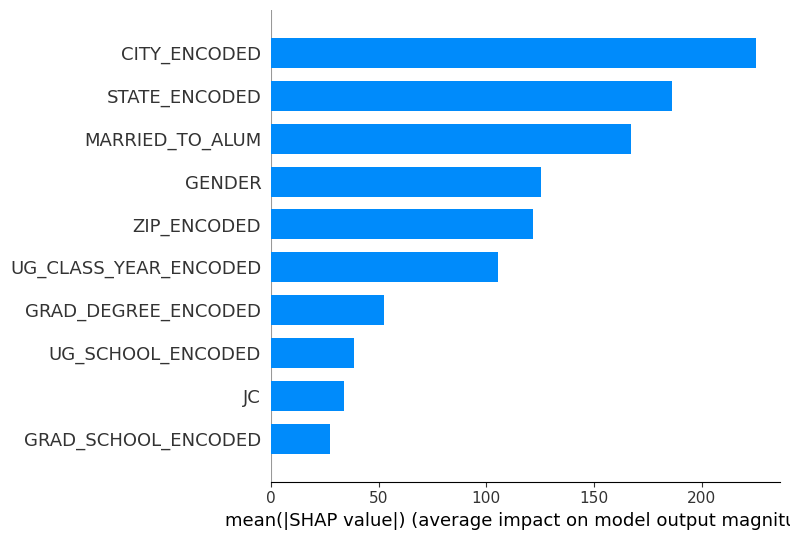

In [63]:
shap_values_class_s = shap_values_class.squeeze()
shap.summary_plot(shap_values_class_s, explain_data, plot_type="bar", max_display=10, show=False)

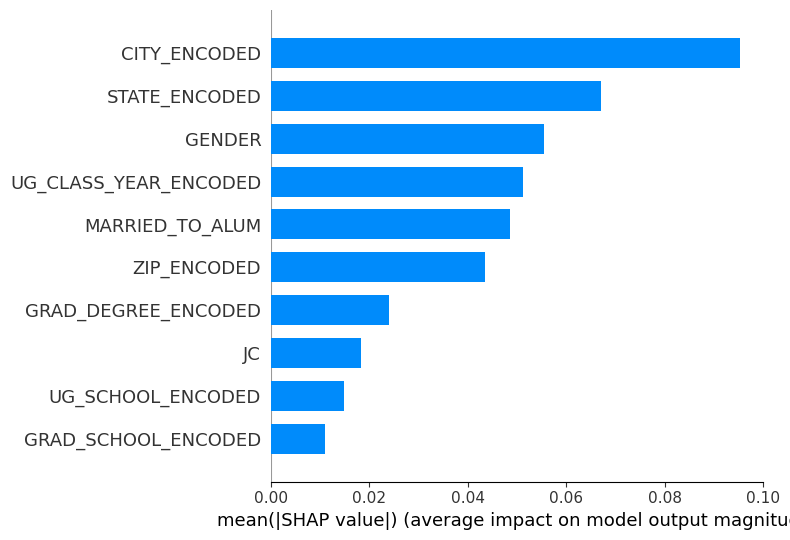

In [64]:
shap_values_reg_s = shap_values_reg.squeeze()
shap.summary_plot(shap_values_reg_s, explain_data, plot_type="bar", max_display=10, show=False)

---

In [ ]:
test_model=mlflow.keras.load_model(f"runs:/{best_run_id}/{best_model_path}")
test=test_model.predict(X_test_encoded)

In [ ]:
test_class=test[1]
test_class=(test_class>0.25).astype(int)

---

#### Confusion Matrix

In [82]:
def create_confusion_matrix(label_true, label_pred):
    mat = confusion_matrix(label_true, label_pred)
    plt.figure(figsize = (6, 6))
    sns.heatmap(mat, cmap = 'Blues', alpha = 0.8, annot = True, fmt = 'd')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    return mat

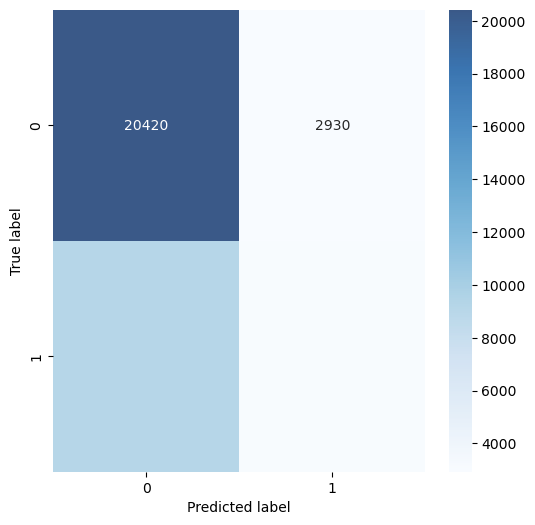

In [156]:
mat=create_confusion_matrix(test_class, Y_classification_test)

In [157]:
mat

array([[20420,  2930],
       [ 9200,  3107]], dtype=int64)